# Network Analytics

Source: https://www.tapadhirdas.com/unr-idd-dataset

## Data Lineage

**- UNR_IDD**

For this Capstone project we are using data fron the University of Nevada.  Specifically, their Reno Intrusion Detection Dataset (UNR-IDD). The main difference between UNR-IDD and other existing datasets is that UNR-IDD consists primarily of network port statistics. These refer to the observed port metrics recorded in switch/router ports within a networking environment. The dataset also includes delta port statistics which indicates the change in magnitude of observed port statistics within a time interval. Compared to datasets that primarily use flow level statistics, these port statistics can provide a fine-grained analysis of network flows from the port level as decisions are made at the port level versus the flow level. This can lead to rapid identification of potential intrusions. UNR-IDD also address the limitation of the presence of tail classes. The dataset ensures that there are enough samples for ML classifiers to achieve high F-Measure scores, uniquely. Our proposed dataset also ensures that there are no missing network metrics and that all data samples are filled.

**- Flow Simulation**

IPerf is used to create TCP and UDP data streams simulating network flows in virtual and real networks using dummy payloads. By using the Mininet API and IPerf, UNR-IDD created a Python script to simulate realistic network flows. Once every 5 seconds, UNR-IDD initiated Iperf traffic between a randomly chosen source-destination host pair with a bandwidth of 10 Mbps and a duration of 5 seconds. UNR-IDD then simulate flows under normal and intrusion conditions to gather data in every possible scenario. To ensure that each normal and anomaly category is minimally variable and adequately represented, UNR-IDD execute the same number of flows while simulating each scenario.


**- Port Statistics**

The corresponding table shows the collected port statistics and their descriptions per port on every switch in the simulated SDN. These statistics relay the collected metrics and magnitudes from every single port within the SDN when a flow is simulated between two hosts. 


**- Port Statistic**|**Description**
---|---
Received Packets | Number of packets received by the port
Received Bytes |	Number of bytes received by the port
Sent Packets |	Number of packets sent by the port
Sent Bytes |	Number of bytes sent
Port alive | Duration	The time port has been alive in seconds
Packets Rx | Dropped	Number of packets dropped by the receiver
Packets Tx | Dropped	Number of packets dropped by the sender
Packets Rx | Errors	Number of transmit errors
Packets Tx | Errors	Number of receive errors



**- Delta Port Statistics**

The corresponding table illustrates the collected delta port statistics and their descriptions per port on every switch. These delta statistics are used to capture the change in collected metrics from every single port within the SDN when a flow is simulated between two hosts. The time interval for these observed metrics is configured as 5 seconds, which can provide greater detail in detecting intrusions. 


**- Delta Port Statistic**|**Description**
---|---
Delta Received Packets|	Number of packets received by the port
Delta Received Bytes|	Number of bytes received by the port
Delta Sent Packets|	Number of packets sent by the port
Delta Sent Bytes|	Number of bytes sent
Delta Port alive| Duration	The time port has been alive in seconds
Delta Packets Rx| Dropped	Number of packets dropped by the receiver
Delta Packets Tx| Dropped	Number of packets dropped by the sender
Delta Packets Rx| Errors	Number of transmit errors
Delta Packets Tx| Errors	Number of receive errors



**- Flow Entry and Flow Table Statistics**

Additionally, UNR-IDD also collect some flow entry and flow table statistics to work in conjunction with the collected port statistics as seen in the corresponding table. These metrics provide information about the conditions of switches in the network and can be collected in any network setting. 

**Statistic**|**Description**
---|---
Connection Point|	Network connection point expressed as a pair of the network element identifier and port number.
Total Load/Rate|	Obtain the current observed total load/rate (in bytes/s) on a link.
Total Load/Latest|	Obtain the latest total load bytes counter viewed on that link.
Unknown Load/Rate|	Obtain the current observed unknown-sized load/rate (in bytes/s) on a link.
Unknown Load/Latest|	Obtain the latest unknown-sized load bytes counter viewed on that link.
Time seen|	When the above-mentioned values were last seen.
is_valid|	Indicates whether this load was built on valid values.
TableID|	Returns the Table ID values.
ActiveFlowEntries|	Returns the number of active flow entries in this table.
PacketsLookedUp|	Returns the number of packets looked up in the table.
PacketsMatched|	Returns the number of packets that successfully matched in the table.
MaxSize|	Returns the maximum size of this table.




In [ ]:
from google.colab import files
upload = files.upload()

Saving UNR-IDD.csv to UNR-IDD (2).csv


In [ ]:
!pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
sns.color_palette()

# from pandas_profiling import ProfileReport
# import plotly 


import tpot


# Import several other classifiers for ensemble
# from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

# Support tools
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Warning
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

### Loading Dataset

In [ ]:
import pandas as pd
raw_df = pd.read_csv('UNR-IDD.csv')

In [ ]:
raw_df.head(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

**Comment:** Continuous and discrete numerical variables, as well as categorical features.

In [ ]:
# Checking for duplicates
raw_df[raw_df.duplicated() == True]

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
32287,of:000000000000000a,Port#:3,66,9078,8992,63,56,0,0,0,...,0,0,True,0,4,201,123,-1,PortScan,Attack


In [ ]:
# Missing values checking
pd.DataFrame(data={'% of Missing Values':round(raw_df.isna().sum()/raw_df.isna().count()*100,2)})

,% of Missing Values
Switch ID,0.00
Port Number,0.00
Received Packets,0.00
Received Bytes,0.00
Sent Bytes,0.00
Sent Packets,0.00
Port alive Duration (S),0.00
Packets Rx Dropped,0.00
Packets Tx Dropped,0.00
Packets Rx Errors,0.00


In [ ]:
# Converting object to categorical features
for i in raw_df:
  if raw_df[i].dtypes == 'object':
    raw_df[i] = raw_df[i].astype('category')

In [ ]:
# Numerical columns
num_cols = list(raw_df._get_numeric_data().columns)
num_cols

['Received Packets',
 'Received Bytes',
 'Sent Bytes',
 'Sent Packets',
 'Port alive Duration (S)',
 'Packets Rx Dropped',
 'Packets Tx Dropped',
 'Packets Rx Errors',
 'Packets Tx Errors',
 'Delta Received Packets',
 'Delta Received Bytes',
 'Delta Sent Bytes',
 'Delta Sent Packets',
 'Delta Port alive Duration (S)',
 'Delta Packets Rx Dropped',
 ' Delta Packets Tx Dropped',
 'Delta Packets Rx Errors',
 'Delta Packets Tx Errors',
 'Connection Point',
 'Total Load/Rate',
 'Total Load/Latest',
 'Unknown Load/Rate',
 'Unknown Load/Latest',
 'Latest bytes counter',
 'is_valid',
 'Table ID',
 'Active Flow Entries',
 'Packets Looked Up',
 'Packets Matched',
 'Max Size']

In [ ]:
# Categorical columns
cat_cols = ['Label', 'Binary Label', 'Switch ID', 'Port Number']


In [ ]:
# Printing unique values
for i in cat_cols:
  print(f'{i}: {raw_df[i].nunique()}')

Label: 6
Binary Label: 2
Switch ID: 12
Port Number: 4


In [ ]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Received Packets,37411.00,21618.90,65283.17,9.00,329.00,1170.00,3417.00,352772.00
Received Bytes,37411.00,26474909.81,37030440.61,786.00,91040.50,12630515.00,37832295.00,271592472.00
Sent Bytes,37411.00,24512120.64,34398760.73,5705.00,57759.50,12626576.00,31764427.00,239242994.00
Sent Packets,37411.00,33626.82,88792.97,41.00,347.00,1240.00,3968.00,421598.00
Port alive Duration (S),37411.00,911.10,982.11,26.00,136.00,259.00,1747.00,3317.00
Packets Rx Dropped,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Tx Dropped,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Rx Errors,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Tx Errors,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delta Received Packets,37411.00,194.96,1087.14,0.00,2.00,4.00,6.00,15695.00


In [ ]:
for column in cat_cols:
    print(raw_df[column].value_counts())
    print('-'*50)

PortScan     9500
TCP-SYN      9081
Blackhole    8420
Diversion    5615
Normal       3773
Overflow     1022
Name: Label, dtype: int64
--------------------------------------------------
Attack    33638
Normal     3773
Name: Binary Label, dtype: int64
--------------------------------------------------
of:000000000000000c    5490
of:000000000000000a    5097
of:0000000000000003    4910
of:0000000000000001    3780
of:0000000000000004    3386
of:0000000000000007    2620
of:000000000000000b    2476
of:0000000000000008    2208
of:0000000000000005    2056
of:0000000000000002    1884
of:0000000000000006    1752
of:0000000000000009    1752
Name: Switch ID, dtype: int64
--------------------------------------------------
Port#:1    11903
Port#:2    11846
Port#:3     8961
Port#:4     4701
Name: Port Number, dtype: int64
--------------------------------------------------


## Exploratory Data Analysis

- Function: plotting numerical features

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='lightblue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Univariate analysis (continuous numerical)

In [ ]:
num_cols_continuous = ['Received Packets', 'Received Bytes',  'Sent Bytes',
            'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
            'Delta Received Bytes', 'Delta Sent Packets', 'Delta Sent Bytes', 'Delta Port alive Duration (S)',
            'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate',
            'Unknown Load/Latest', 'Latest bytes counter', 'Active Flow Entries',
            'Packets Looked Up', 'Packets Matched']

In [ ]:
# Mean, Median and Mode
for i in num_cols_continuous:
    mean=raw_df[i].mean()
    median=raw_df[i].median()
    mode=raw_df[i].tolist()[0]
    print(f'Feature: {i}, Mean: {mean}, Median: {median}, Mode: {mode}')

Feature: Received Packets, Mean: 21618.89716928176, Median: 1170.0, Mode: 132
Feature: Received Bytes, Mean: 26474909.81176659, Median: 12630515.0, Mode: 9181
Feature: Sent Bytes, Mean: 24512120.639009915, Median: 12626576.0, Mode: 6311853
Feature: Sent Packets, Mean: 33626.82400898132, Median: 1240.0, Mode: 238
Feature: Port alive Duration (S), Mean: 911.0964154927696, Median: 259.0, Mode: 46
Feature: Delta Received Packets, Mean: 194.95808719360616, Median: 4.0, Mode: 0
Feature: Delta Received Bytes, Mean: 342700.08059126994, Median: 556.0, Mode: 0
Feature: Delta Sent Packets, Mean: 178.0832642805592, Median: 4.0, Mode: 2
Feature: Delta Sent Bytes, Mean: 314512.5657694261, Median: 556.0, Mode: 280
Feature: Delta Port alive Duration (S), Mean: 4.842933896447569, Median: 5.0, Mode: 5
Feature: Connection Point, Mean: 2.4378391382213787, Median: 2.0, Mode: 1
Feature: Total Load/Rate, Mean: 19214.551361898906, Median: 0.0, Mode: 0
Feature: Total Load/Latest, Mean: 514559.6624254898, Media

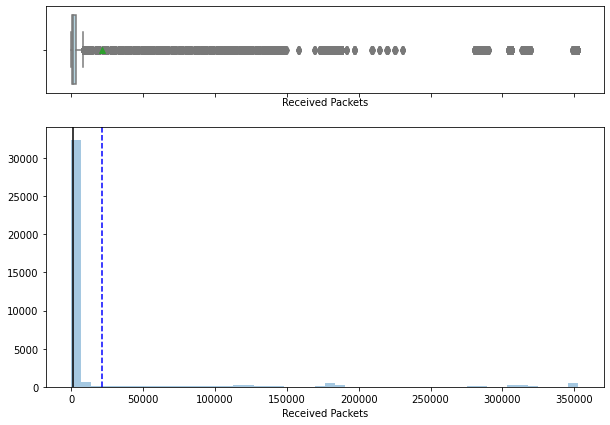

In [ ]:
# Numerical continous analysis
histogram_boxplot(raw_df['Received Packets'])

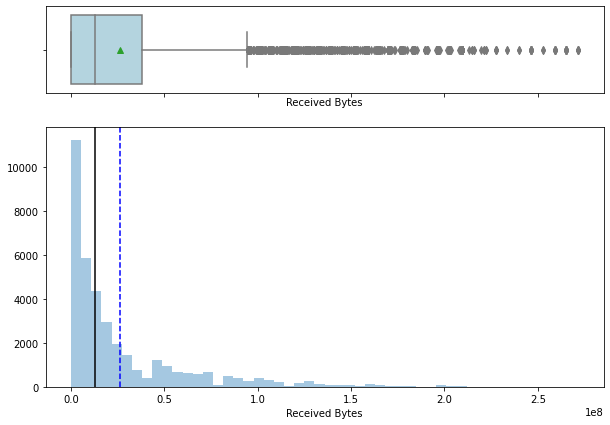

In [ ]:
histogram_boxplot(raw_df['Received Bytes'])

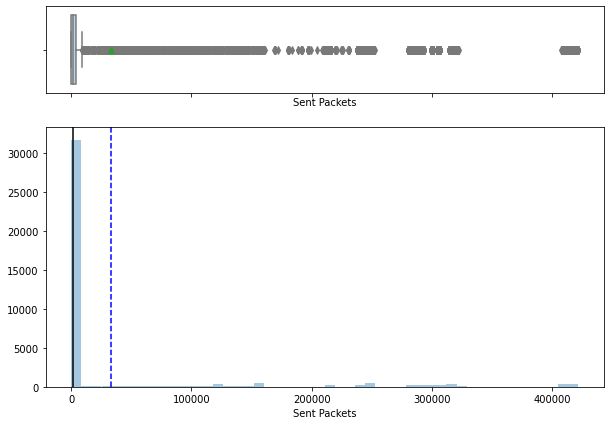

In [ ]:
histogram_boxplot(raw_df['Sent Packets'])

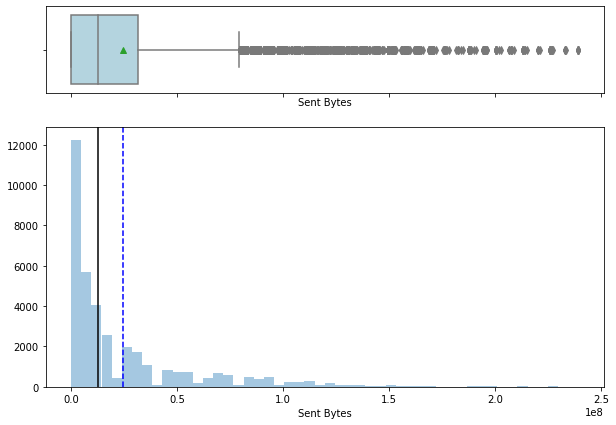

In [ ]:
histogram_boxplot(raw_df['Sent Bytes'])

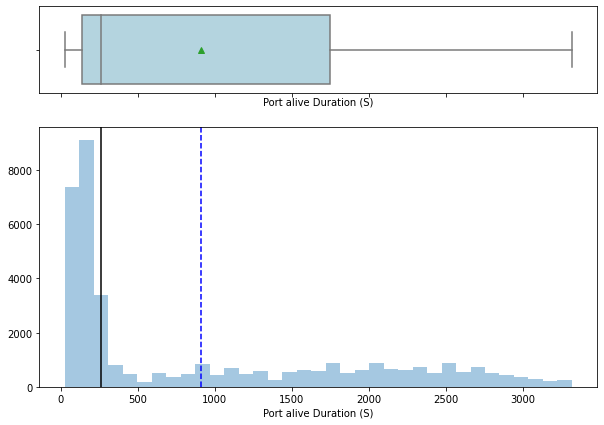

In [ ]:
histogram_boxplot(raw_df['Port alive Duration (S)'])

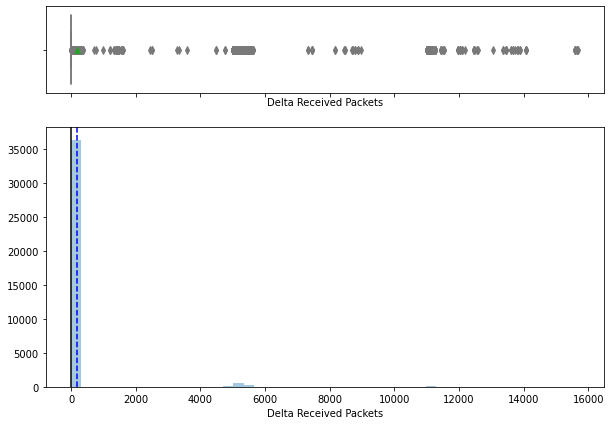

In [ ]:
histogram_boxplot(raw_df['Delta Received Packets'])

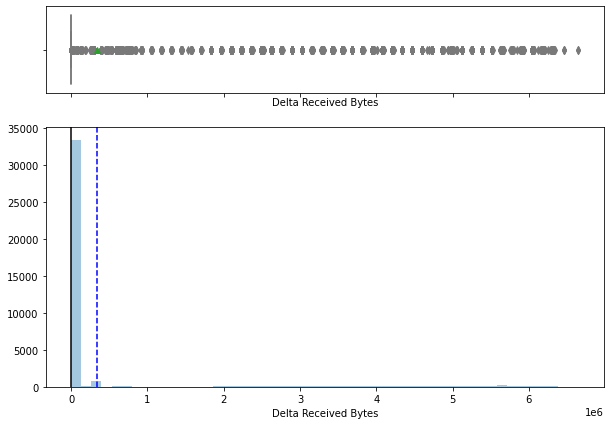

In [ ]:
histogram_boxplot(raw_df['Delta Received Bytes'])

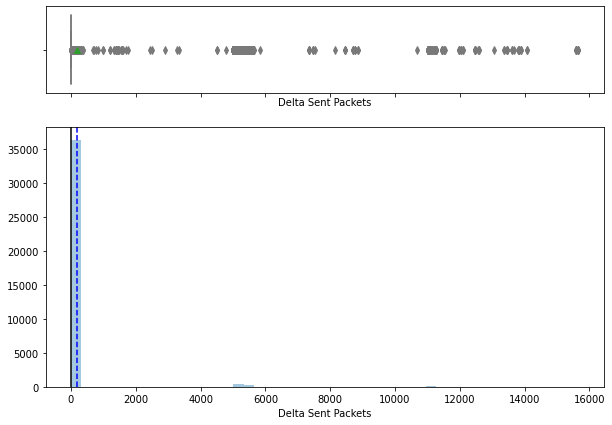

In [ ]:
histogram_boxplot(raw_df['Delta Sent Packets'])

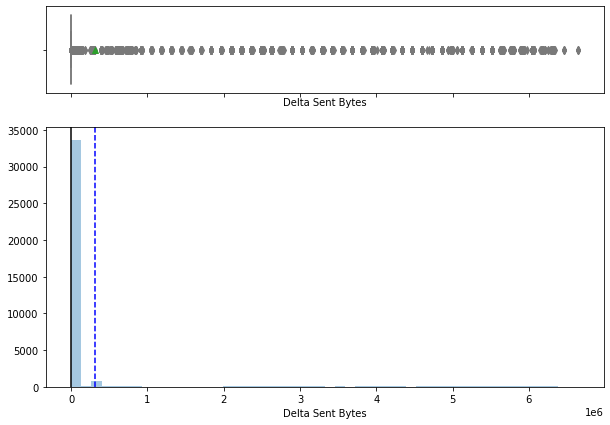

In [ ]:
histogram_boxplot(raw_df['Delta Sent Bytes'])

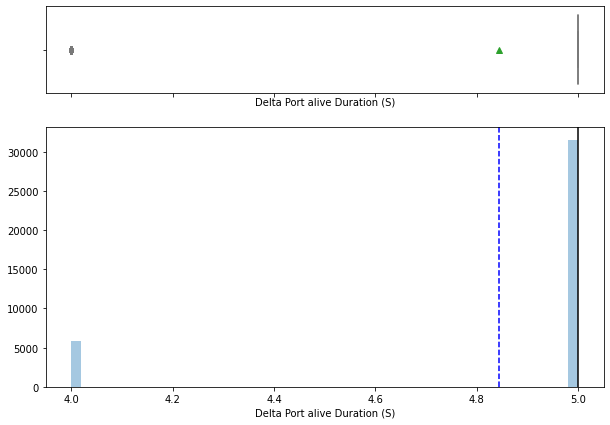

In [ ]:
histogram_boxplot(raw_df['Delta Port alive Duration (S)'])

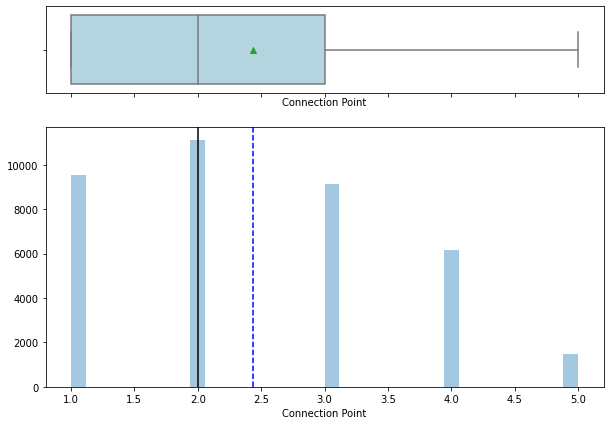

In [ ]:
histogram_boxplot(raw_df['Connection Point'])

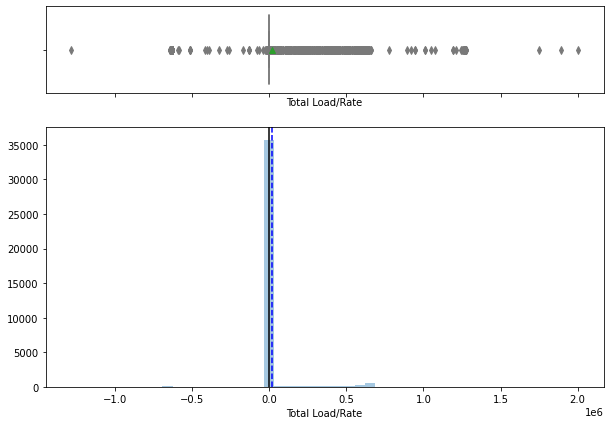

In [ ]:
histogram_boxplot(raw_df['Total Load/Rate'])

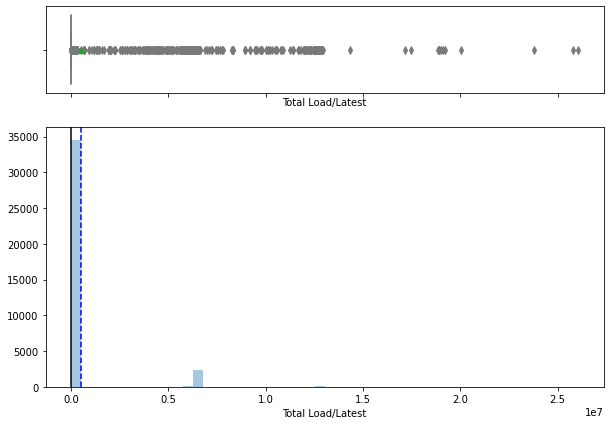

In [ ]:
histogram_boxplot(raw_df['Total Load/Latest'])

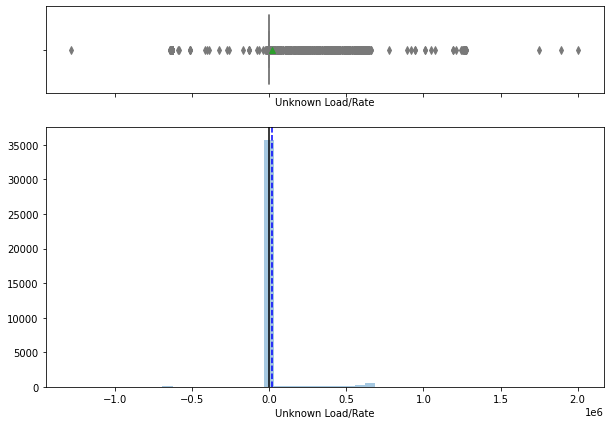

In [ ]:
histogram_boxplot(raw_df['Unknown Load/Rate'])

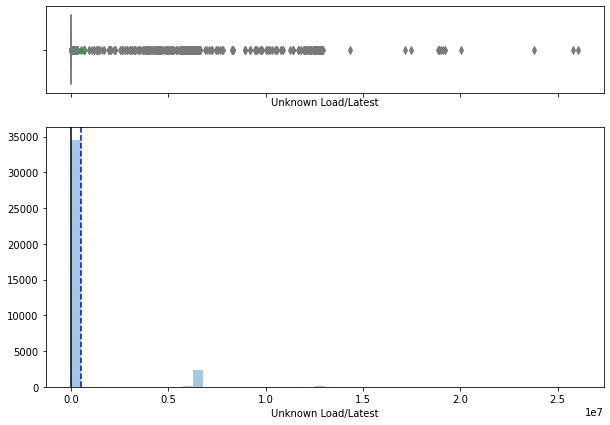

In [ ]:
histogram_boxplot(raw_df['Unknown Load/Latest'])

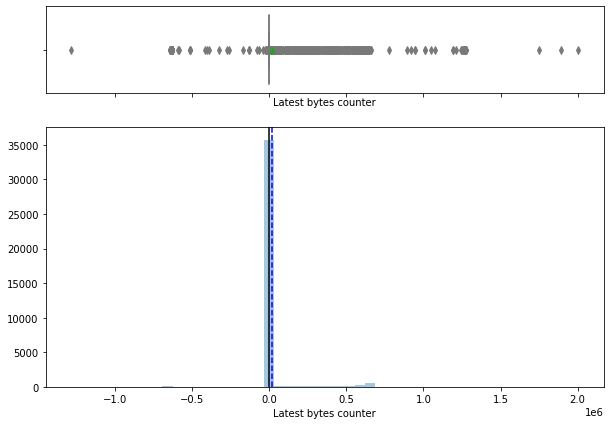

In [ ]:
histogram_boxplot(raw_df['Latest bytes counter'])

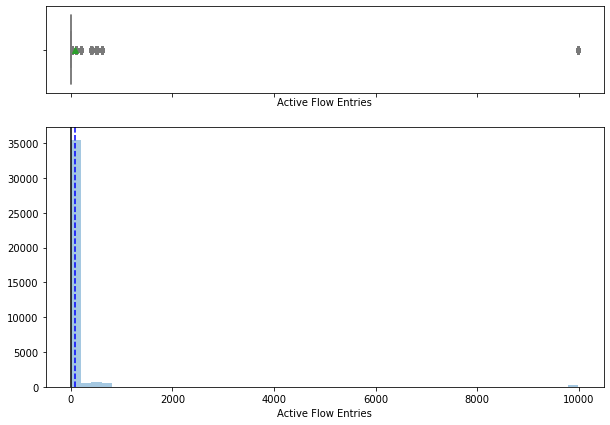

In [ ]:
histogram_boxplot(raw_df['Active Flow Entries'])

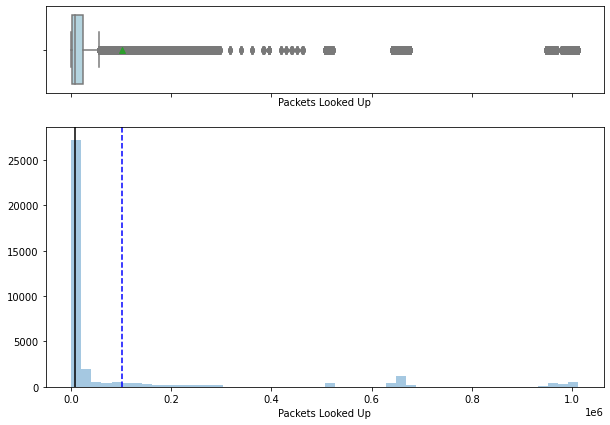

In [ ]:
histogram_boxplot(raw_df['Packets Looked Up'])

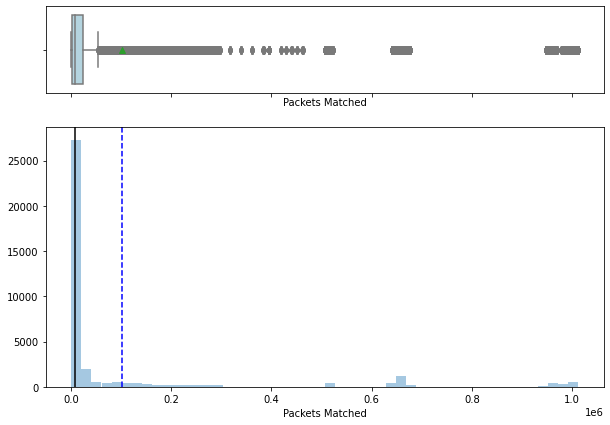

In [ ]:
histogram_boxplot(raw_df['Packets Matched'])

### Univariate analysis (discrete numerical)

In [ ]:
# Numerical discrete columns
num_cols_discrete = list(set(num_cols) - set(num_cols_continuous))
num_cols_discrete

['Table ID',
 'Packets Tx Dropped',
 'Packets Rx Dropped',
 'Packets Rx Errors',
 'Delta Packets Rx Dropped',
 'is_valid',
 ' Delta Packets Tx Dropped',
 'Packets Tx Errors',
 'Max Size',
 'Delta Packets Tx Errors',
 'Delta Packets Rx Errors']

In [ ]:
# Mean, Median and Mode
for i in num_cols_discrete:
    mean=raw_df[i].mean()
    median=raw_df[i].median()
    mode=raw_df[i].tolist()[0]
    print(f'Feature: {i}, Mean: {mean}, Median: {median}, Mode: {mode}')

Feature: Table ID, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Tx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Rx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Rx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Delta Packets Rx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: is_valid, Mean: 1.0, Median: 1.0, Mode: True
Feature:  Delta Packets Tx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Tx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Max Size, Mean: -1.0, Median: -1.0, Mode: -1
Feature: Delta Packets Tx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Delta Packets Rx Errors, Mean: 0.0, Median: 0.0, Mode: 0


**Comments:** We will probably drop all these features 

### Univariate analysis (categorical features)

- Function: plotting categorical features

In [ ]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

In [ ]:
cat_cols

['Label', 'Binary Label', 'Switch ID', 'Port Number']

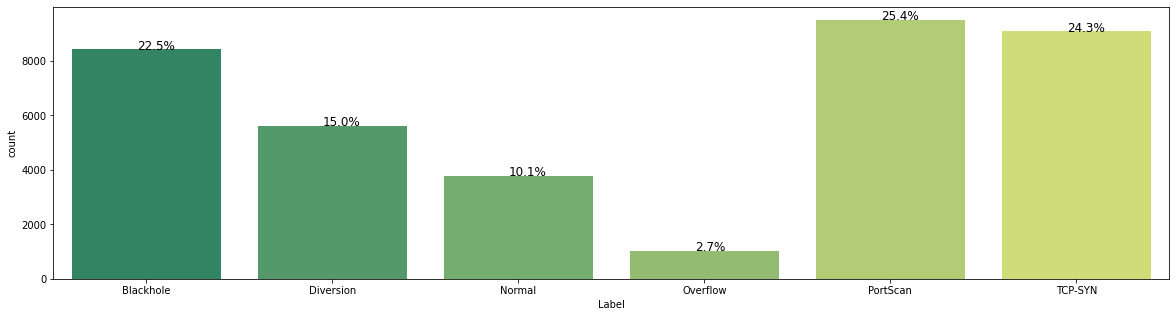

In [ ]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(raw_df['Label'],palette='summer')
perc_on_bar(ax,raw_df['Label'])

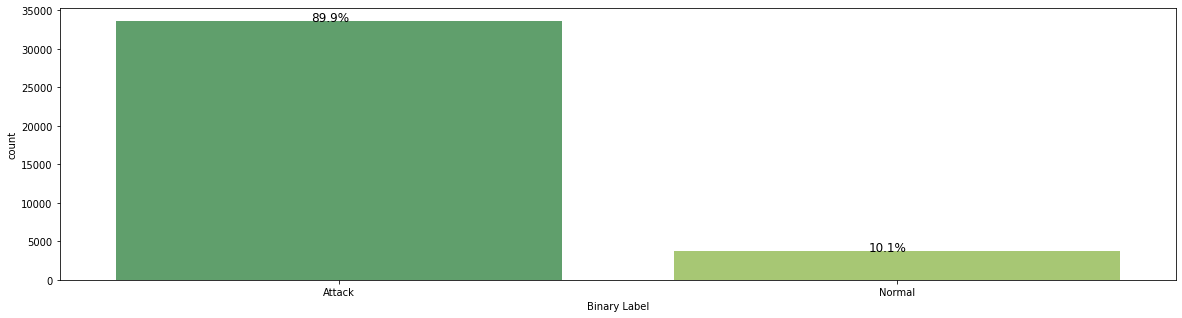

In [ ]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(raw_df['Binary Label'],palette='summer')
perc_on_bar(ax,raw_df['Binary Label'])

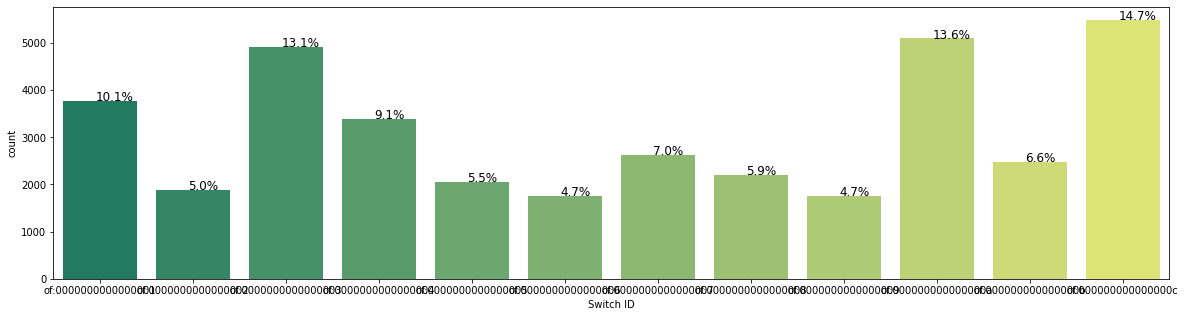

In [ ]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(raw_df['Switch ID'],palette='summer')
perc_on_bar(ax,raw_df['Switch ID'])

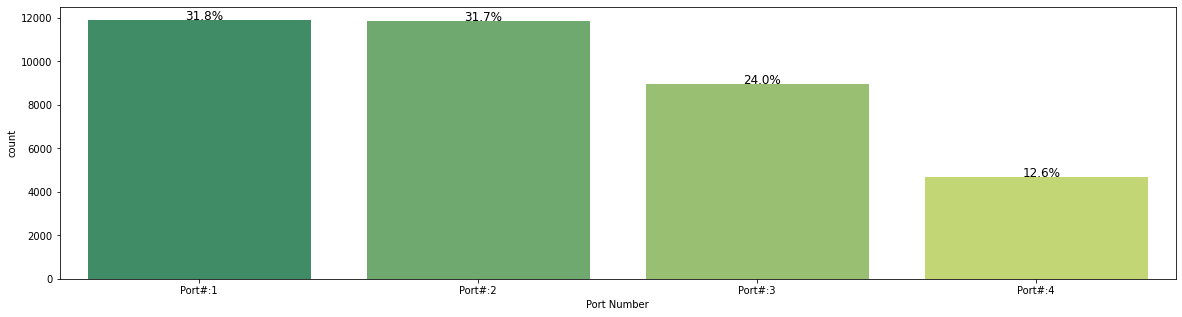

In [ ]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(raw_df['Port Number'],palette='summer')
perc_on_bar(ax,raw_df['Port Number'])

### Bivariate analysis (categorical features)

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,raw_df["Label"],margins=True)
    print(tab1)
    print('-'*120)
    tab2 = pd.crosstab(x,raw_df["Label"],margins=True, normalize="index")
    print(tab2)
    print('-'*120)
    tab = pd.crosstab(x,raw_df["Label"],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,4))
    total = len(x) # length of the column
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
cat_cols

['Label', 'Binary Label', 'Switch ID', 'Port Number']

Label        Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN    All
Port Number                                                                  
Port#:1           2680       1792    1179       375      3000     2877  11903
Port#:2           2680       1792    1179       321      3000     2874  11846
Port#:3           2100       1115     709       207      2500     2330   8961
Port#:4            960        916     706       119      1000     1000   4701
All               8420       5615    3773      1022      9500     9081  37411
------------------------------------------------------------------------------------------------------------------------
Label        Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN
Port Number                                                           
Port#:1           0.23       0.15    0.10      0.03      0.25     0.24
Port#:2           0.23       0.15    0.10      0.03      0.25     0.24
Port#:3           0.23       0.12    0.08      0.

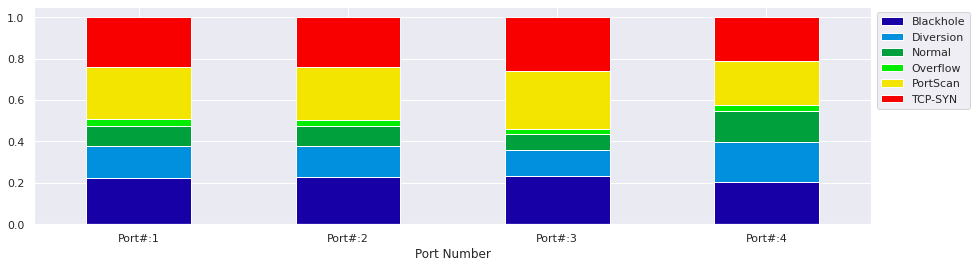

In [ ]:
stacked_plot(raw_df['Port Number'])

Label                Blackhole  Diversion  Normal  Overflow  PortScan  \
Switch ID                                                               
of:0000000000000001        960        796       0        40      1000   
of:0000000000000002        480        398       0        14       500   
of:0000000000000003        960        956     942        68      1000   
of:0000000000000004        720        677     468        33       750   
of:0000000000000005        620          0       0         0       750   
of:0000000000000006        420          0       0         0       750   
of:0000000000000007        720        398       0        14       750   
of:0000000000000008        720          0       0         0       750   
of:0000000000000009        420          0       0         0       750   
of:000000000000000a        960        956     944       211      1000   
of:000000000000000b        480        478     472        51       500   
of:000000000000000c        960        956     947  

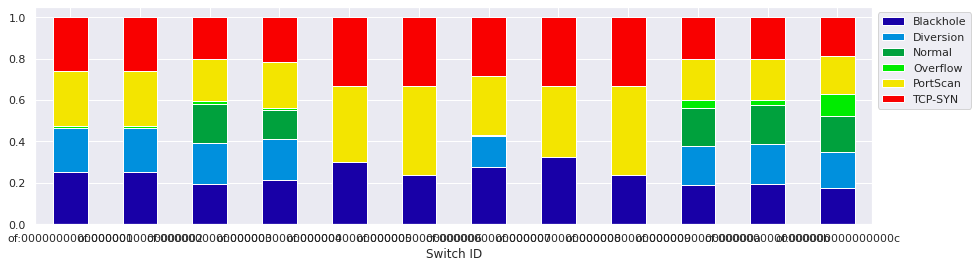

In [ ]:
stacked_plot(raw_df['Switch ID'])

Label         Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN    All
Binary Label                                                                  
Attack             8420       5615       0      1022      9500     9081  33638
Normal                0          0    3773         0         0        0   3773
All                8420       5615    3773      1022      9500     9081  37411
------------------------------------------------------------------------------------------------------------------------
Label         Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN
Binary Label                                                           
Attack             0.25       0.17    0.00      0.03      0.28     0.27
Normal             0.00       0.00    1.00      0.00      0.00     0.00
All                0.23       0.15    0.10      0.03      0.25     0.24
------------------------------------------------------------------------------------------------------------------------


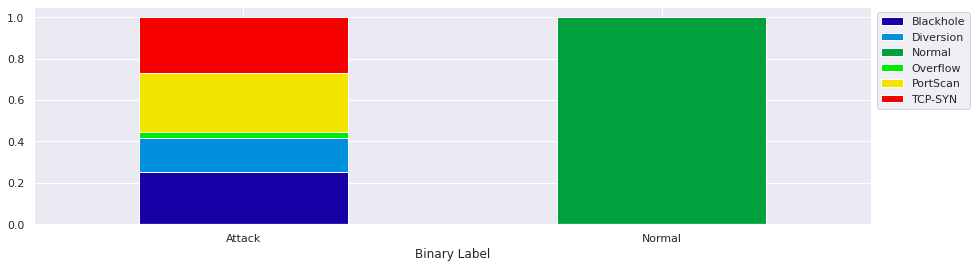

In [ ]:
stacked_plot(raw_df['Binary Label'])

### Bivariate Analysis

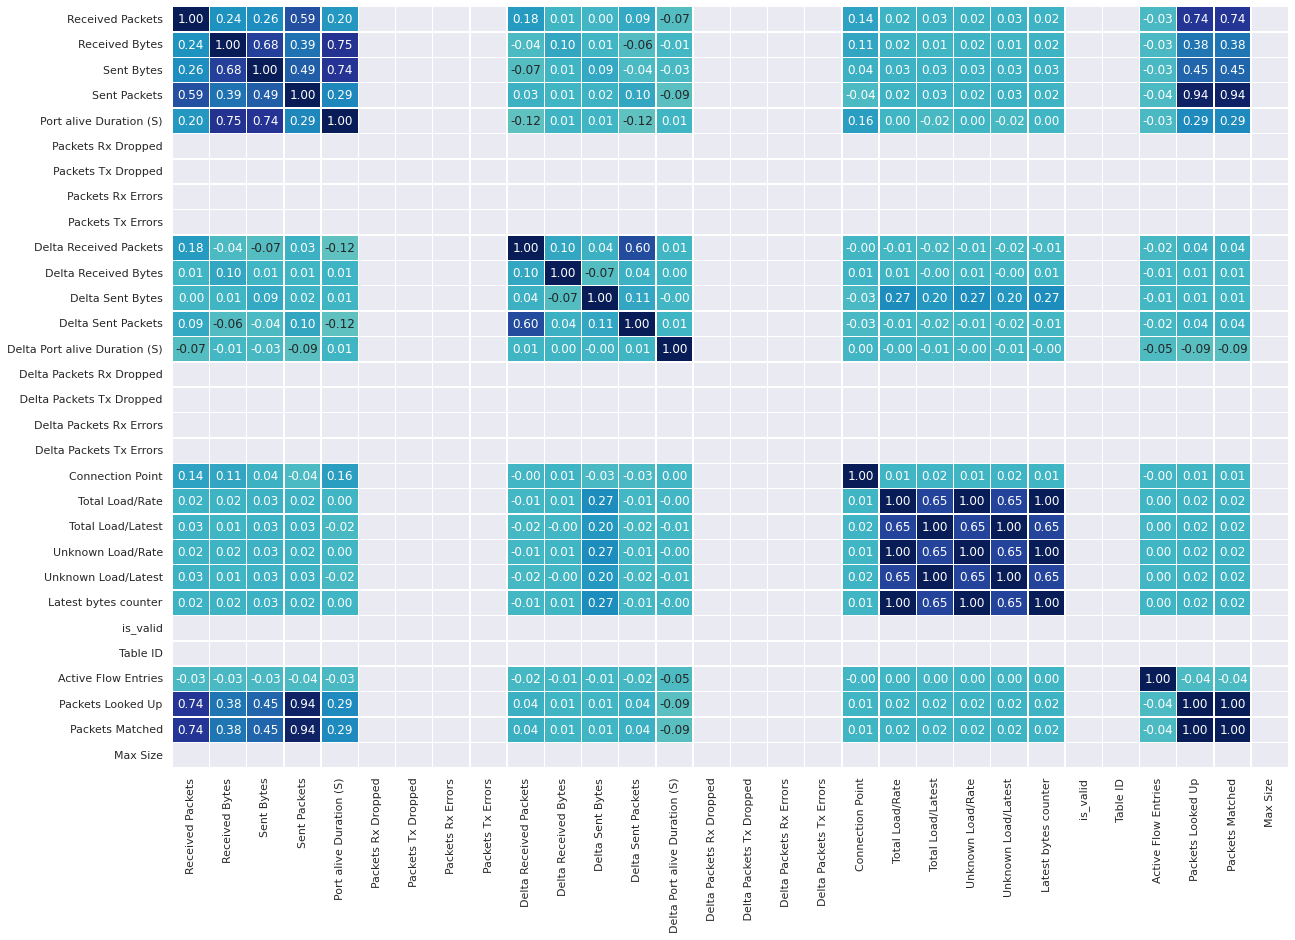

In [ ]:
plt.figure(figsize=(20,14))

sns.heatmap(raw_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')            

plt.show()

**Comment:** Here we can see plenty of opportunity to drop features that won't impact much on our analysis. Some of them inclusive are filled with only zeros.


In [ ]:
raw_df.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [ ]:
cleanned_df = raw_df[['Switch ID',
                     'Port Number',
                     'Received Packets',
                     'Received Bytes',
                     'Sent Bytes',
                     'Sent Packets',
                     'Port alive Duration (S)',
                     'Delta Received Packets',
                     'Delta Received Bytes',
                     'Delta Sent Bytes',
                     'Delta Sent Packets',
                     'Delta Port alive Duration (S)',
                     'Connection Point',
                     'Total Load/Rate',
                     'Total Load/Latest',
                     'Unknown Load/Rate',
                     'Unknown Load/Latest',
                     'Latest bytes counter',
                     'Active Flow Entries',
                     'Packets Looked Up',
                     'Packets Matched',
                     'Label',
                     'Binary Label']]

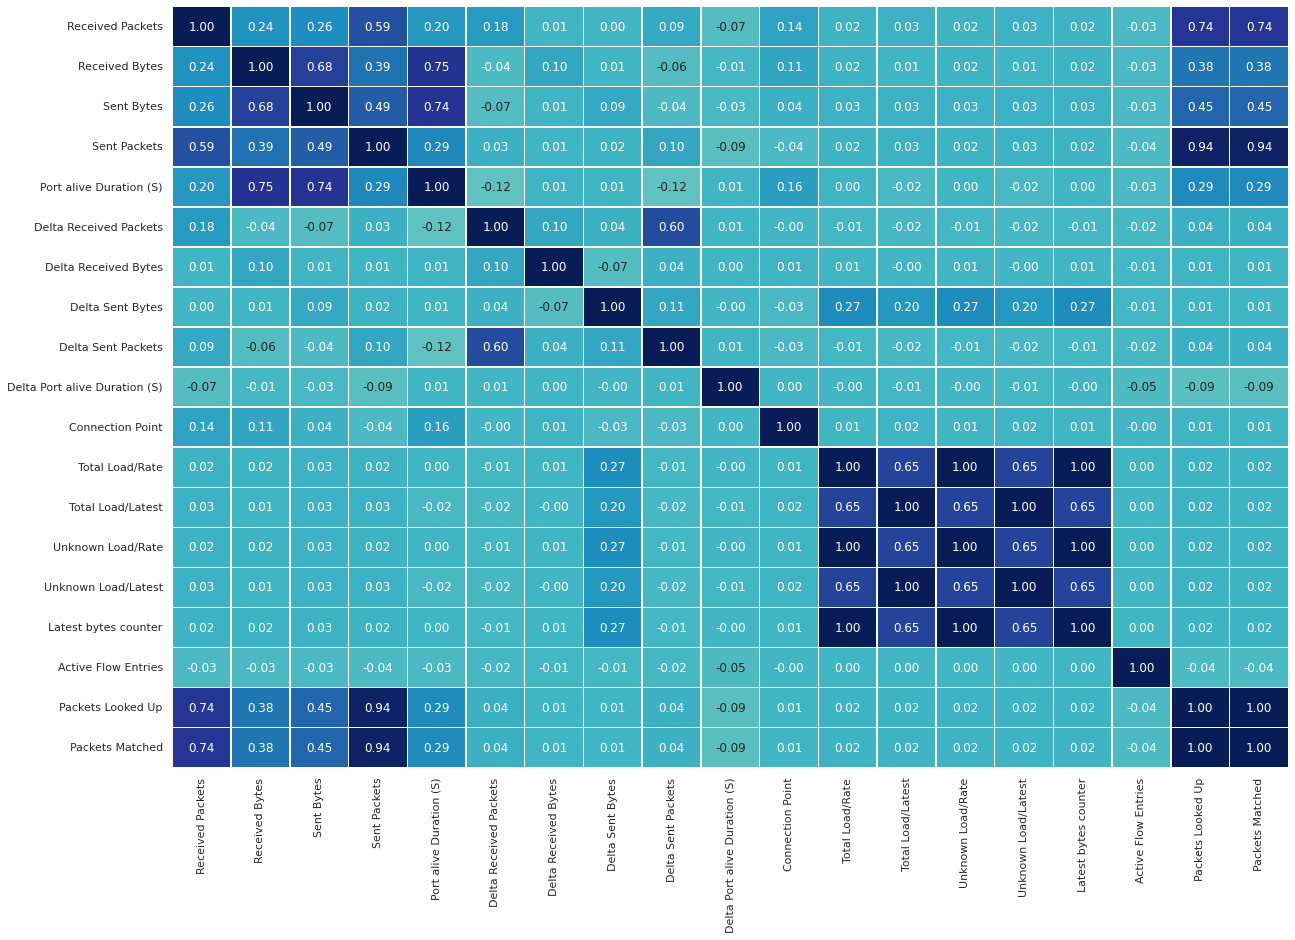

In [ ]:
plt.figure(figsize=(20,14))

sns.heatmap(cleanned_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')            

plt.show()

to be continued...


In [ ]:
# Applying Chi-Square test over target feature Attition_Flag
for i in cat_cols:  
  crosstab = pd.crosstab(raw_df['Label'],raw_df[i])  

  Ho = "ProdTaken has --NO-- effect on " + i   # Stating the Null Hypothesis
  Ha = "ProdTaken has an effect on " + i   # Stating the Alternate Hypothesis

  chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

  if p_value < 0.05:  # Setting our significance level at 5%
      print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
  else:
      print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

ProdTaken has an effect on Label as the p_value (0.0) < 0.05
ProdTaken has an effect on Binary Label as the p_value (0.0) < 0.05
ProdTaken has an effect on Switch ID as the p_value (0.0) < 0.05
ProdTaken has an effect on Port Number as the p_value (0.0) < 0.05


In [ ]:
# Saving data prior to Preparation
df_saved = raw_df.copy()

In [ ]:
# Preprocessing dataFrame
df_start = raw_df.copy()

## Data Pre-processing

- Prepare the data for analysis
- Missing value treatment
- Outlier detection
- Feature Engineering
- Prepare data for modeling

In [ ]:
# X has features but not target value
X_prep = df_start.drop('Label', axis=1)


# y only has target value
y_prep = df_start['Label']

In [ ]:
# Transforming categorical features into dummies variables
X_prep_cat = pd.get_dummies(X_prep, drop_first=True)

In [ ]:
# Label encoding target feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_prep = le.fit_transform(y_prep)

In [ ]:
y_prep

array([5, 5, 5, ..., 4, 4, 4])

In [ ]:
print(X_prep_cat.shape)
print(y_prep.shape)

(37411, 45)
(37411,)


In [ ]:
# Saving dataset prior to treat for outliers
X_saved = X_prep_cat
y_saved = y_prep

### Outliers Treatment


In [ ]:
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_prep_cat)

# Once identified, we can remove the outliers from the training dataset
# select all rows that are not outliers
mask = yhat != -1

X_lr_cat, y_lr = X_prep_cat[mask], y_prep[mask]

# summarize the shape of the updated training dataset
print(X_prep_cat.shape, y_prep.shape)

(37411, 45) (37411,)


In [ ]:
# First split in Train (0.80) vs. Test (0.20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep_cat, y_prep, test_size=0.2, stratify=y_prep, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# From numpy.array to pd.Series
y_prep = pd.Series(y_prep)

In [ ]:
# easy trick
print(X_prep_cat.shape)
print("\n")
print(y_prep.value_counts())

(37411, 45)


4    9500
5    9081
0    8420
1    5615
2    3773
3    1022
dtype: int64


* Label column not that imbalanced

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
train_features = X_train
train_label = pd.DataFrame(y_train)
test_features = X_test
test_label = pd.DataFrame(y_test)

In [ ]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(22446, 45)
(22446, 1)
(7483, 45)
(7483, 1)


In [ ]:
%%time
from sklearn.metrics import make_scorer


from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, 
                      population_size=8,
                      scoring=None,
                      verbosity=2,
                      random_state=42)
tpot.fit(train_features, train_label)
print(f"Tpop score on test data: {tpot.score(test_features, test_label):.2f}")
tpot.export('tpot_network_analytics.py')

Optimization Progress:   0%|          | 0/48 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9392319160769631

Generation 2 - Current best internal CV score: 0.9392319160769631

Generation 3 - Current best internal CV score: 0.9523300460765018

Generation 4 - Current best internal CV score: 0.9523300460765018

Generation 5 - Current best internal CV score: 0.9523300460765018

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
Tpop score on test data: 0.96
CPU times: user 1h 33min 44s, sys: 51.4 s, total: 1h 34min 36s
Wall time: 1h 33min 38s


### Best pipeline:

XGBClassifier(input_matrix,

learning_rate=1.0,

max_depth=5,

min_child_weight=8,

n_estimators=100,

n_jobs=1,

subsample=0.8500000000000001,

verbosity=0)

#### Tpop score on test data: 0.96